1. Create 3 separate *'*.csv'* files named `'detail.csv'`, `'detailVol.csv'` and `'detailTemp.csv'`.

	1. Combine all the data in sheets named like "Detail_67_" only, among the two data files provided, and save into `'detail.csv'`

In [15]:
# detail file csv creation
import pandas as pd
import numpy as np

xlsx = pd.ExcelFile('data.xlsx') 
df1 = pd.read_excel(xlsx, 'Detail_67_1_1') 
df2 = pd.read_excel(xlsx, 'Detail_67_1_1_1') 
df3 = pd.read_excel(xlsx, 'Detail_67_1_1_2') 
df4 = pd.read_excel(xlsx, 'Detail_67_1_1_3') 
df5 = pd.read_excel(xlsx, 'Detail_67_1_1_4') 
df6 = pd.read_excel(xlsx, 'Detail_67_1_1_5') 
df7 = pd.read_excel(xlsx, 'Detail_67_1_1_6') 
     

# Use pandas.concat()to join the DataFrames 
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
     
# Save the DataFrame to a CSV.  
df.to_csv("detail.csv", index=False)

  B. Combine all the data in sheets named like "DetailVol_67_" only, among the two data files provided, and save into `'detailVol.csv'`

In [16]:
# detailVol file csv creation
xlsx = pd.ExcelFile('data.xlsx') 
df1 = pd.read_excel(xlsx, 'DetailVol_67_1_1') 
df2 = pd.read_excel(xlsx, 'DetailVol_67_1_1_1') 
df3 = pd.read_excel(xlsx, 'DetailVol_67_1_1_2') 
df4 = pd.read_excel(xlsx, 'DetailVol_67_1_1_3') 
df5 = pd.read_excel(xlsx, 'DetailVol_67_1_1_4') 
df6 = pd.read_excel(xlsx, 'DetailVol_67_1_1_5') 
df7 = pd.read_excel(xlsx, 'DetailVol_67_1_1_6') 
     

# Use pandas.concat()to join the DataFrames 
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
     
# Save the DataFrame to a CSV.  
df.to_csv("detailVol.csv", index=False)

C. Combine all the data in sheets named like "DetailTemp_67_" only, among the two data files provided, and save into `'detailTemp.csv'`

In [22]:

# detailTemp file csv creation
xlsx = pd.ExcelFile('data.xlsx') 
xlsx_data1 = pd.ExcelFile('data_1.xlsx') 
df1 = pd.read_excel(xlsx, 'DetailTemp_67_1_1') 
df2 = pd.read_excel(xlsx, 'DetailTemp_67_1_1_1') 
df3 = pd.read_excel(xlsx, 'DetailTemp_67_1_1_2') 
df4 = pd.read_excel(xlsx_data1, 'DetailTemp_67_1_1_3') 
df5 = pd.read_excel(xlsx_data1, 'DetailTemp_67_1_1_4') 
df6 = pd.read_excel(xlsx_data1, 'DetailTemp_67_1_1_5') 
df7 = pd.read_excel(xlsx_data1, 'DetailTemp_67_1_1_6') 
     

# Use pandas.concat()to join the DataFrames 
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
     
# Save the DataFrame to a CSV.  
df.to_csv("detailTemp.csv", index=False)

2. Apply down-sampling method to reduce the sampling rate  to `1 sample/minute`. Appy the same to `'detail.csv'`, `'detailVol.csv'` and `'detailTemp.csv'` and creating 3 files named  `'detailDownsampled.csv'`, `'detailVolDownsampled.csv'` and `'detailTempDownsampled.csv'`

In [27]:
from matplotlib import pyplot 


def down_sampling(file, Timeseries):
    df_detail = pd.read_csv(
        file, 
        parse_dates=[Timeseries], 
        index_col=[Timeseries]
    )
    if(file=="detail.csv"):
        df_detail = df_detail.drop('Record Index', axis=1)
    else:
        df_detail = df_detail.drop('Record ID', axis=1)
        if(file == "detailVol.csv"):
            df_detail = df_detail.drop('Gap of Voltage', axis=1)

    ## Downsampling to 1 Minute
    resample = df_detail.resample('1T')
    minute_mean_ = resample.mean()
    print(minute_mean_)
    df = pd.DataFrame(minute_mean_)
  
    
    # saving the dataframe
    df.to_csv(f'{file[:-4]}Downsampled.csv')
    
    #plotting data points
    
    minute_mean_.plot() 
    pyplot.show()
    
    
    

                              JumpTo      Cycle       Step    Cur(mA)  \
Relative Time(h:min:s.ms)                                               
2021-05-03 00:00:00        54.125932  10.870658  43.629448 -10.798061   
2021-05-03 00:01:00        54.269231  10.897436  43.743590 -11.054274   
2021-05-03 00:02:00        54.269231  10.897436  43.743590 -11.056667   
2021-05-03 00:03:00        54.269231  10.897436  43.743590 -11.494466   
2021-05-03 00:04:00        54.269231  10.897436  43.743590 -14.972799   
...                              ...        ...        ...        ...   
2021-05-03 03:14:00        53.058201  10.952381  42.550265  91.386420   
2021-05-03 03:15:00        32.974790   7.164706  27.628571  89.787395   
2021-05-03 03:16:00        11.452555   2.890511  10.562044  90.112409   
2021-05-03 03:17:00         7.000000   2.000000   7.000000  89.405000   
2021-05-03 03:18:00         7.000000   2.000000   7.000000  87.355556   

                           Voltage(V)  CapaCity(mA

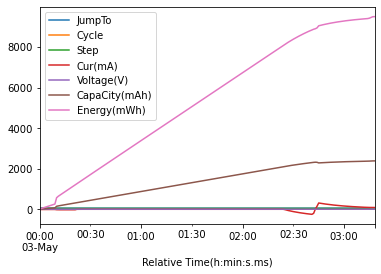

In [28]:
# detail downsampling
down_sampling('detail.csv','Relative Time(h:min:s.ms)')

                           Auxiliary channel TU1 U(V)
Relative Time(h:min:s.ms)                            
2021-05-03 00:00:00                         -0.001255
2021-05-03 00:01:00                         -0.001255
2021-05-03 00:02:00                         -0.001255
2021-05-03 00:03:00                         -0.001254
2021-05-03 00:04:00                         -0.001254
...                                               ...
2021-05-03 03:14:00                         -0.001257
2021-05-03 03:15:00                         -0.001274
2021-05-03 03:16:00                         -0.001286
2021-05-03 03:17:00                         -0.001295
2021-05-03 03:18:00                         -0.001256

[199 rows x 1 columns]


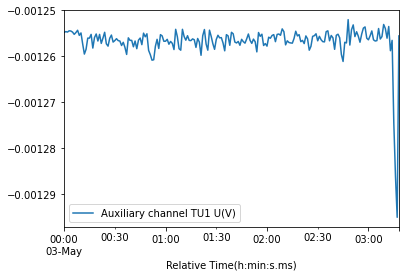

In [29]:
# detailVol downsampling
down_sampling('detailVol.csv','Relative Time(h:min:s.ms)')

                           Auxiliary channel TU1 T(°C)  Gap of Temperature
Relative Time(h:min:s.ms)                                                 
2021-05-03 00:00:00                          28.572065                   0
2021-05-03 00:01:00                          28.508483                   0
2021-05-03 00:02:00                          28.441410                   0
2021-05-03 00:03:00                          28.376004                   0
2021-05-03 00:04:00                          28.329038                   0
...                                                ...                 ...
2021-05-03 03:14:00                          27.889771                   0
2021-05-03 03:15:00                          27.793613                   0
2021-05-03 03:16:00                          27.606569                   0
2021-05-03 03:17:00                          27.741667                   0
2021-05-03 03:18:00                          27.800000                   0

[199 rows x 2 columns]


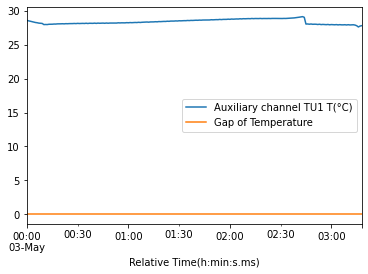

In [30]:
# detailTemp downsampling
down_sampling('detailTemp.csv','Relative Time(h:min:s.ms)')